# 機械学習フロー

In [1]:
###################
#インポート
###################

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

###################
#ＣＳＶ表示数の変更
###################

#pd.set_option('display.max_rows', None)    #行（index)全表示
pd.set_option("display.max_columns", None) #列（colums)全表示
#pd.set_option('display.max_rows', 10)       #行（index)の最大表示数を10に変更
#pd.set_option("display.max_columns", 10)  #列（colums)の最大表示数を10に変更

###################
#ＣＳＶインポート
###################

df = pd.read_csv("application_train.csv") #CSVをインポート

# 欠損値がある行と列を削除
df = df.dropna(how='any', axis=1)
df = df.dropna(how='any', axis=0)
display(df) #インポートしたデータを出力
display(df.shape) #(307511, 55)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,3,3,THURSDAY,9,0,0,0,0,1,1,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(307511, 55)

In [2]:
# #全ての組み合わせの散布図を一度に表示させる

# import seaborn as sns
# from matplotlib import pyplot as plt

# sns.pairplot(df, hue='TARGET', vars=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE'])




,TARGET,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_CREDIT,FLAG_EMP_PHONE
305655,0,225000.0,-2095,1312110.0,1
80240,0,31500.0,365243,225000.0,0
212808,0,360000.0,-6466,180000.0,1
241921,0,202500.0,-2709,679500.0,1
57960,0,225000.0,-5170,1125000.0,1
...,...,...,...,...,...
146033,1,252000.0,-2307,1530000.0,1
275137,1,67500.0,365243,263686.5,0
288921,1,315000.0,-4006,733315.5,1
141722,1,324000.0,-1870,383089.5,1


(1000, 4)
(1000,)


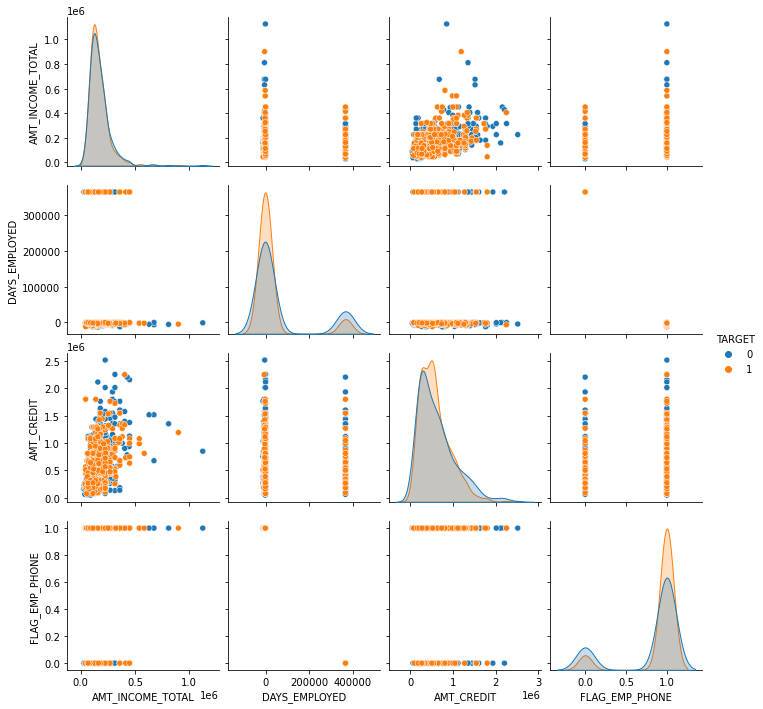

In [3]:

#目的変数を決める（AMT_INCOME_TOTAL、DAYS_EMPLOYED、AMT_CREDIT、FLAG_EMP_PHONE）で見ていく。
df_4ov = df.loc[ :  , ["TARGET","AMT_INCOME_TOTAL","DAYS_EMPLOYED","AMT_CREDIT","FLAG_EMP_PHONE"]]


#TARGETが0と1の数を調べる
# display((df_4ov.query("TARGET == 0")).shape) #(282686, 127)
# display((df_4ov.query("TARGET == 1")).shape) #(24825, 127)


#-------------target0、target1のサンプルを1000ずつランダムに取り出す（ターゲット数が不均衡のため）-----------

#検証する特徴量を選択する

# target0とtarget1にデータを分割
t0 = df_4ov.query("TARGET == 0")
t1 = df_4ov.query("TARGET == 1")

# TARGETが0と1の数は少なくて24825だったので、ランダムに500を抽出、データフレームに変換
t0 = t0.sample(n=500)
t1 = t1.sample(n=500)
# display(t0.head())
# display(t1.head())

# t0とt１を結合,０と１が５００ずつのデータセットにする
df_1000 = pd.concat([t0, t1])
display(df_1000)

#全ての組み合わせの散布図を一度に表示させて特徴量を探す

import seaborn as sns
from matplotlib import pyplot as plt

sns.pairplot(df_1000, hue='TARGET')


# X array,yarrayに格納
y = df_1000["TARGET"] #TARGETだけのDF
y = np.array(y) #yをndarrayに変換

X = df_1000.drop("TARGET", axis=1) #TARGET以外のDF（TARGETを.dropで削除）
X = np.array(X) #Xをndarrayに変換
print(X.shape)
print(y.shape)


### 【問題1】クロスバリデーション

In [4]:

import numpy as np
from sklearn.model_selection import KFold


kf = KFold(n_splits = 5, shuffle = True)

for train_index, test_index in kf.split(X, y):
    print("train_index:", train_index.shape, "test_index:", test_index.shape)

train_index: (800,) test_index: (200,)
train_index: (800,) test_index: (200,)
train_index: (800,) test_index: (200,)
train_index: (800,) test_index: (200,)
train_index: (800,) test_index: (200,)


### 【問題2】グリッドサーチ（パラメータの最適化）

In [5]:
# library

from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import mglearn
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
#訓練用と検証用に分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=0)
print("Size of training set:{}　size of test set:{}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        #それぞれのパラメータの組み合わせに足してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        #SVCをテストセットで評価
        score = svm.score(X_test, y_test)
        
        #良いスコアであればスコアとパラメータを保持
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set:700　size of test set:300
Best score: 0.48
Best parameters: {'C': 0.001, 'gamma': 0.001}


### 【問題3】Kernelからの調査

・KaggleのKernelにあったアイデア

①複数のCSVをIDごとにグルーピングし統計量を算出する

②pd.factorizeを使いカテゴリ変数をユニークな数値に変換して帰ってきたndarrayを元のデータフレームに戻す

③新しい特徴量の生成し検証する（業界特有の知識（＝ドメイン知識）が必要）

df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']


In [7]:
#-------------DAYS_EMPLOYED_PERC　と　INCOME_CREDIT_PERC　について試してみる-----------

#新しいDFを作成する
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
# df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
# df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
# df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

#DFのシェイプを調べる
# display(df['DAYS_EMPLOYED_PERC'].shape) # (307511,)
# display(df['INCOME_CREDIT_PERC'].shape) # (307511,)

#大元のdfは(307511, 55)である為、dfに下記２つを結合する
df_new = pd.concat([df,df['DAYS_EMPLOYED_PERC'],df['INCOME_CREDIT_PERC']], axis=1)
display(df_new.shape)


(307511, 59)

In [8]:
# 欠損値がある行と列を削除
df = df_new.dropna(how='any', axis=1)
df = df_new.dropna(how='any', axis=0)
display(df) #インポートしたデータを出力
display(df.shape) #(307511, 55)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067329,0.498036,0.067329,0.498036
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.070862,0.208736,0.070862,0.208736
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011814,0.500000,0.011814,0.500000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.159905,0.431748,0.159905,0.431748
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.152418,0.236842,0.152418,0.236842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.025303,0.618375,0.025303,0.618375
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-17.580890,0.267112,-17.580890,0.267112
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,3,3,THURSDAY,9,0,0,0,0,1,1,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.529266,0.225776,0.529266,0.225776
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,1,0,1,0,0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.400134,0.462029,0.400134,0.462029


(307511, 59)

In [9]:
#目的変数を決める（AMT_INCOME_TOTAL、DAYS_EMPLOYED、AMT_CREDIT、FLAG_EMP_PHONE）にDAYS_EMPLOYED_PERC　と　INCOME_CREDIT_PERCを追加する。
df_6ov = df.loc[ :  , ["TARGET","AMT_INCOME_TOTAL","DAYS_EMPLOYED","AMT_CREDIT","DAYS_EMPLOYED_PERC","FLAG_EMP_PHONE","INCOME_CREDIT_PERC"]]


#TARGETが0と1の数を調べる
# display((df_4ov.query("TARGET == 0")).shape) #(282686, 127)
# display((df_4ov.query("TARGET == 1")).shape) #(24825, 127)


#-------------target0、target1のサンプルを1000ずつランダムに取り出す（ターゲット数が不均衡のため）-----------

#検証する特徴量を選択する

# target0とtarget1にデータを分割
t0 = df_6ov.query("TARGET == 0")
t1 = df_6ov.query("TARGET == 1")

# TARGETが0と1の数は少なくて24825だったので、ランダムに500を抽出、データフレームに変換
t0 = t0.sample(n=500)
t1 = t1.sample(n=500)
# display(t0.head())
# display(t1.head())

# t0とt１を結合,０と１が５００ずつのデータセットにする
df_1000 = pd.concat([t0, t1])
display(df_1000)

#全ての組み合わせの散布図を一度に表示させて特徴量を探す #★☆★☆ここを動かすとエラーになるなぜ？

# import seaborn as sns
# from matplotlib import pyplot as plt

# sns.pairplot(df_1000, hue='TARGET')


# X array,yarrayに格納
y = df_1000["TARGET"] #TARGETだけのDF
y = np.array(y) #yをndarrayに変換

X = df_1000.drop("TARGET", axis=1) #TARGET以外のDF（TARGETを.dropで削除）
X = np.array(X) #Xをndarrayに変換
print(X.shape)
print(y.shape)


,TARGET,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_CREDIT,DAYS_EMPLOYED_PERC,DAYS_EMPLOYED_PERC,FLAG_EMP_PHONE,INCOME_CREDIT_PERC,INCOME_CREDIT_PERC
286497,0,63000.0,-933,104256.0,0.082051,0.082051,1,0.604282,0.604282
202271,0,67500.0,-320,207396.0,0.016302,0.016302,1,0.325464,0.325464
84323,0,180000.0,-377,448299.0,0.029690,0.029690,1,0.401518,0.401518
264501,0,81000.0,-1664,628114.5,0.102799,0.102799,1,0.128957,0.128957
167531,0,72000.0,365243,225000.0,-16.433881,-16.433881,0,0.320000,0.320000
...,...,...,...,...,...,...,...,...,...
175186,1,270000.0,-1010,398016.0,0.051491,0.051491,1,0.678365,0.678365
21974,1,180000.0,-115,180000.0,0.010750,0.010750,1,1.000000,1.000000
172930,1,157500.0,365243,207117.0,-15.259787,-15.259787,0,0.760440,0.760440
26793,1,135000.0,365243,302076.0,-15.910568,-15.910568,0,0.446907,0.446907


(1000, 8)
(1000,)


In [11]:

#データを分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=0)

#-------------グリッドサーチによるベストスコアを算出-----------

print("Size of training set:{}　size of test set:{}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        #それぞれのパラメータの組み合わせに足してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        #SVCをテストセットで評価
        score = svm.score(X_test, y_test)
        
        #良いスコアであればスコアとパラメータを保持
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set:700　size of test set:300
Best score: 0.48
Best parameters: {'C': 1, 'gamma': 0.001}


①グリットサーチでパラメータを最適化したスコア

Size of training set:700　size of test set:300
Best score: 0.48
Best parameters: {'C': 0.001, 'gamma': 0.001}

②Kernelからの調査を取り入れたスコア

Size of training set:700　size of test set:300
Best score: 0.48
Best parameters: {'C': 1, 'gamma': 0.001}

スコアが変わらないのでXに対して標準化を行ってみる。

In [16]:
#　library

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler#標準化のライブラリ

#------------↓X訓練用X検証用データの標準化------------
scaler = StandardScaler()  #インスタンス化StandardScalerクラスをscalerに格納した
scaler.fit(X_train)   #StandardScalerクラスのfitメソッドをX_trainに適用
X_train_transform = scaler.fit_transform(X_train) #★☆★☆これは何を表してるのか謎

#データのタイプを確認
# print(type(X_train_transform))
# print(X_train_transform.shape)
# print(X_train_transform)
#------------↑------------

scaler.fit(X_test) #インスタンス化StandardScalerクラスをscalerに格納した
X_test_transform = scaler.fit_transform(X_test)  #StandardScalerクラスのfitメソッドをX_trainに適用

#データのタイプを確認
# print(type(X_test_transform))
# print(X_test_transform.shape)
# print(X_test_transform)
#------------↑------------

In [17]:
#-------------グリッドサーチによるベストスコアを算出-----------

print("Size of training set:{}　size of test set:{}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        #それぞれのパラメータの組み合わせに足してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train_transform, y_train) #ここが　X_train⇒X_train_transformとなった
        
        #SVCをテストセットで評価
        score = svm.score(X_test_transform, y_test) #ここが　X_test⇒X_test_transformとなった
        
        #良いスコアであればスコアとパラメータを保持
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set:700　size of test set:300
Best score: 0.54
Best parameters: {'C': 100, 'gamma': 0.1}


⇒標準化してスコアを伸ばすことができた。Kernelのアイデアはさらに工夫が必要のようです。

In [36]:
#クロスバリテーションを試してみる、データは３つに分け①訓練用②学習用③テスト用とする

# for train_index, test_index in kf.split(X, y):
#     print("train_index:", train_index.shape, "test_index:", test_index.shape)